# Read data

In [1]:
import pandas as pd

### Read train data

In [2]:
train_filename = "dataset/sts-b_train.csv"
data_train = pd.read_csv(train_filename)
data_train.head()

,sentence1,sentence2,score,id
0,A plane is taking off.,An air plane is taking off.,5.00,0
1,A man is playing a large flute.,A man is playing a flute.,3.80,1
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80,2
3,Three men are playing chess.,Two men are playing chess.,2.60,3
4,A man is playing the cello.,A man seated is playing the cello.,4.25,4


### Test data

In [3]:
test_filename = "dataset/sts-b_test.csv"
data_test = pd.read_csv(test_filename)
data_test.head()

,id,sentence1,sentence2
0,100000,A man with a hard hat is dancing.,A man wearing a hard hat is dancing.
1,100001,A young child is riding a horse.,A child is riding a horse.
2,100002,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.
3,100003,A woman is playing the guitar.,A man is playing guitar.
4,100004,A woman is playing the flute.,A man is playing a flute.


# Preprocessing

In [4]:
import string
from nltk import pos_tag
from nltk import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [5]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def preprocessing(sentence):
    # Lower all words
    pre_sentence = sentence.lower()
    # Remove punctuations
    table_punct = str.maketrans('', '', string.punctuation)
    pre_sentence = pre_sentence.translate(table_punct)
    # Tokenize
    pre_sentence = word_tokenize(pre_sentence)
    # Lemmatize
    pre_sentence = [WordNetLemmatizer().lemmatize(word, get_wordnet_pos(word)) for word in pre_sentence]
    # Join tokens
    pre_sentence = ' '.join(pre_sentence)
    
    return pre_sentence

In [6]:
data_train['pre_sentence1'] = data_train.apply(lambda row: preprocessing(row['sentence1']), axis=1)
data_train['pre_sentence2'] = data_train.apply(lambda row: preprocessing(row['sentence2']), axis=1)

In [7]:
data_test['pre_sentence1'] = data_test.apply(lambda row: preprocessing(row['sentence1']), axis=1)
data_test['pre_sentence2'] = data_test.apply(lambda row: preprocessing(row['sentence2']), axis=1)

In [8]:
data_train.head()

,sentence1,sentence2,score,id,pre_sentence1,pre_sentence2
0,A plane is taking off.,An air plane is taking off.,5.00,0,a plane be take off,an air plane be take off
1,A man is playing a large flute.,A man is playing a flute.,3.80,1,a man be play a large flute,a man be play a flute
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80,2,a man be spread shred cheese on a pizza,a man be spread shred cheese on an uncooked pizza
3,Three men are playing chess.,Two men are playing chess.,2.60,3,three men be play chess,two men be play chess
4,A man is playing the cello.,A man seated is playing the cello.,4.25,4,a man be play the cello,a man seat be play the cello


# Split train data to train and validation

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data_train, data_validation = train_test_split(data_train, test_size=0.15, random_state=42)

# Building dictionary

In [11]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [12]:
train_text = data_train['pre_sentence1'].tolist() + data_train['pre_sentence2'].tolist()
validation_text = data_validation['pre_sentence1'].tolist() + data_validation['pre_sentence2'].tolist()
test_text = data_test['pre_sentence1'].tolist() + data_test['pre_sentence2'].tolist()

texts = train_text + validation_text + test_text

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Padding and indexing sentences

### Indexing

In [14]:
data_train['seq1'] = data_train.apply(lambda row: tokenizer.texts_to_sequences([row['pre_sentence1']])[0], axis=1)
data_train['seq2'] = data_train.apply(lambda row: tokenizer.texts_to_sequences([row['pre_sentence2']])[0], axis=1)

In [15]:
data_validation['seq1'] = data_validation.apply(lambda row: tokenizer.texts_to_sequences([row['pre_sentence1']])[0], axis=1)
data_validation['seq2'] = data_validation.apply(lambda row: tokenizer.texts_to_sequences([row['pre_sentence2']])[0], axis=1)

In [16]:
data_test['seq1'] = data_test.apply(lambda row: tokenizer.texts_to_sequences([row['pre_sentence1']])[0], axis=1)
data_test['seq2'] = data_test.apply(lambda row: tokenizer.texts_to_sequences([row['pre_sentence2']])[0], axis=1)

In [17]:
data_train.head()

,sentence1,sentence2,score,id,pre_sentence1,pre_sentence2,seq1,seq2
1176,A sheep stands on a hillside.,A large sheep standing on a hill.,4.00,1176,a sheep stand on a hillside,a large sheep stand on a hill,"[1, 318, 37, 8, 1, 3918]","[1, 112, 318, 37, 8, 1, 722]"
4786,"Tornadoes rip through Midwest, killing 6 and d...","Tornadoes, damaging storms hit U.S. Midwest, k...",3.20,4789,tornado rip through midwest kill 6 and devasta...,tornado damage storm hit u midwest kill 5,"[1897, 3919, 69, 3239, 21, 402, 7, 7464, 3240]","[1897, 777, 607, 137, 24, 3239, 21, 373]"
3091,"The Standard & Poor's 500 index advanced 6.48,...",The broader Standard & Poor's 500 Index .SPX r...,4.75,3094,the standard poor 500 index advanced 648 or 07...,the broader standard poor 500 index spx rise 6...,"[2, 374, 525, 517, 178, 1221, 4840, 38, 2525, ...","[2, 1022, 374, 525, 517, 178, 866, 131, 4840, ..."
4472,North Korea's third test brings it closer to n...,NATO says North Korea nuclear test is grave th...,2.20,4475,north korea third test brings it closer to nuc...,nato say north korea nuclear test be grave thr...,"[135, 165, 568, 439, 2258, 15, 2051, 5, 85, 48...","[233, 16, 135, 165, 85, 439, 3, 6548, 710, 5, ..."
807,A baby monkey scratches itself.,The monkey scratched his tummy.,3.25,807,a baby monkey scratch itself,the monkey scratch his tummy,"[1, 179, 627, 3920, 1425]","[2, 627, 3920, 41, 8766]"


### Padding

In [18]:
from keras.preprocessing.sequence import pad_sequences

In [19]:
train_max_1_length = len(max(data_train['seq1'].tolist(), key=len))
train_max_2_length = len(max(data_train['seq2'].tolist(), key=len))

validation_max_1_length = len(max(data_validation['seq1'].tolist(), key=len))
validation_max_2_length = len(max(data_validation['seq2'].tolist(), key=len))

test_max_1_length = len(max(data_test['seq1'].tolist(), key=len))
test_max_2_length = len(max(data_test['seq2'].tolist(), key=len))

max_len = max([train_max_1_length, train_max_2_length, validation_max_1_length, validation_max_2_length, test_max_1_length, test_max_2_length])

In [20]:
X_train_1 = pad_sequences(data_train['seq1'].tolist(), padding='post', dtype='int32', maxlen=max_len)
X_train_2 = pad_sequences(data_train['seq2'].tolist(), padding='post', dtype='int32', maxlen=max_len)

In [21]:
X_validation_1 = pad_sequences(data_validation['seq1'].tolist(), padding='post', dtype='int32', maxlen=max_len)
X_validation_2 = pad_sequences(data_validation['seq2'].tolist(), padding='post', dtype='int32', maxlen=max_len)

In [22]:
X_test_1 = pad_sequences(data_test['seq1'].tolist(), padding='post', dtype='int32', maxlen=max_len)
X_test_2 = pad_sequences(data_test['seq2'].tolist(), padding='post', dtype='int32', maxlen=max_len)

# Embedding matrix

In [23]:
import numpy as np

In [24]:
vocab_size = len(word_index) + 1

def build_emb_matrix(vocab_size, word_index):
    embedding_matrix = np.zeros((vocab_size, 100), dtype='float32')
    with open('./glove/glove.6B.100d.txt', 'r', encoding='utf8') as f:
        for i, line in enumerate(f):
            s = line.split(' ')
            if (s[0] in word_index) and (word_index[s[0]] < vocab_size):
                embedding_matrix[word_index[s[0]], :] = np.asarray(s[1:])

    return embedding_matrix

In [25]:
embedding_matrix = build_emb_matrix(vocab_size, word_index)

# Embedding layer

In [41]:
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal
from keras.layers import concatenate, Dense, Dropout, Embedding, Lambda, Multiply, Subtract
from keras import Input, Model, optimizers, regularizers

In [42]:
embedding_layer = Embedding(
    vocab_size,
    100,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=True,
    name='VectorLookup'
)

In [43]:
sent1_seq_in = Input(shape=(max_len,), dtype='int32', name='sent1_seq_in')
embedded_sent1 = embedding_layer(sent1_seq_in)
embedded_sent1_drop = Dropout(0.1)(embedded_sent1)
encoded_sent1 = Lambda(lambda x: K.sum(x, axis=1))(embedded_sent1_drop)

In [44]:
sent2_seq_in = Input(shape=(max_len,), dtype='int32', name='sent2_seq_in')
embedded_sent2 = embedding_layer(sent2_seq_in)
embedded_sent2_drop = Dropout(0.1)(embedded_sent2)
encoded_sent2 = Lambda(lambda x: K.sum(x, axis=1))(embedded_sent2_drop)

In [45]:
mul = Multiply()([encoded_sent1, encoded_sent2])
sub = Subtract()([encoded_sent1, encoded_sent2])
dif = Lambda(lambda x: K.abs(x))(sub)

In [46]:
concatenated = concatenate([mul, dif], axis=-1)

In [47]:
x = Dense(50, activation='sigmoid', kernel_initializer=RandomNormal(stddev=0.1),
                bias_initializer=RandomNormal(stddev=0.1))(concatenated)
x = Dropout(0.1)(x)
x = Dense(6, activation='softmax', kernel_initializer=RandomNormal(stddev=0.1),
        bias_initializer=RandomNormal(stddev=0.1))(x)

In [48]:
gate_mapping = K.variable(value=np.array([[0.], [1.], [2.], [3.], [4.], [5.]]))
preds = Lambda(lambda a: K.dot(a, gate_mapping), name='Prediction')(x)

In [49]:
model = Model([sent1_seq_in, sent2_seq_in], preds)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sent1_seq_in (InputLayer)       (None, 272)          0                                            
__________________________________________________________________________________________________
sent2_seq_in (InputLayer)       (None, 272)          0                                            
__________________________________________________________________________________________________
VectorLookup (Embedding)        (None, 272, 100)     1178100     sent1_seq_in[0][0]               
                                                                 sent2_seq_in[0][0]               
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 272, 100)     0           VectorLookup[0][0]         

Afin de trouver une meilleure fonction pour monitor, nous avons utilisé la fonction pearson https://stackoverflow.com/questions/48171188/pearsons-linear-coefficient-keras. Il aurait été plus bénéfique de trouver une implémentation de spearman, mais après plusieurs recherches, nous n'avons rien trouvé.

In [50]:
def pearsonr(x, y):
    xm = x - K.mean(x)
    ym = y - K.mean(y)
    r_num = K.sum(xm * ym)
    xs = K.sum(K.pow(xm, 2))
    ys = K.sum(K.pow(ym, 2))
    r_den = K.sqrt(xs) * K.sqrt(ys)
    r = r_num / r_den

    return r

def pearson(y_true, y_pred):
    return pearsonr(y_true, y_pred)

In [51]:
early_stopping = EarlyStopping(monitor='pearson', patience=3, mode='max')

In [52]:
Adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

model.compile(
    optimizer=Adam,
    loss='mse',
    metrics=[pearson]
)

In [53]:
Y_train = data_train['score'].tolist()
Y_valid = data_validation['score'].tolist()

In [54]:
history = model.fit([X_train_1.tolist(), X_train_2.tolist()], Y_train,
                    verbose=1,
                    epochs=250,
                    batch_size=64,
                    callbacks=[early_stopping],
                    validation_data=([X_validation_1.tolist(), X_validation_2.tolist()], Y_valid))

Train on 4847 samples, validate on 856 samples
Epoch 1/250
4847/4847 [==============================] - 3s 570us/step - loss: 2.1237 - pearson: 0.1017 - val_loss: 2.1588 - val_pearson: 0.3140
Epoch 2/250
4847/4847 [==============================] - 2s 481us/step - loss: 2.0009 - pearson: 0.2647 - val_loss: 2.0171 - val_pearson: 0.4215
Epoch 3/250
4847/4847 [==============================] - 2s 489us/step - loss: 1.8669 - pearson: 0.3896 - val_loss: 1.9438 - val_pearson: 0.4917
Epoch 4/250
4847/4847 [==============================] - 2s 503us/step - loss: 1.6796 - pearson: 0.4903 - val_loss: 1.6351 - val_pearson: 0.5580
Epoch 5/250
4847/4847 [==============================] - 2s 509us/step - loss: 1.4035 - pearson: 0.5994 - val_loss: 1.4060 - val_pearson: 0.6082
Epoch 6/250
4847/4847 [==============================] - 2s 480us/step - loss: 1.2857 - pearson: 0.6333 - val_loss: 1.4423 - val_pearson: 0.6178
Epoch 7/250
4847/4847 [==============================] - 2s 478us/step - loss: 1.12

In [55]:
from keras.utils import plot_model

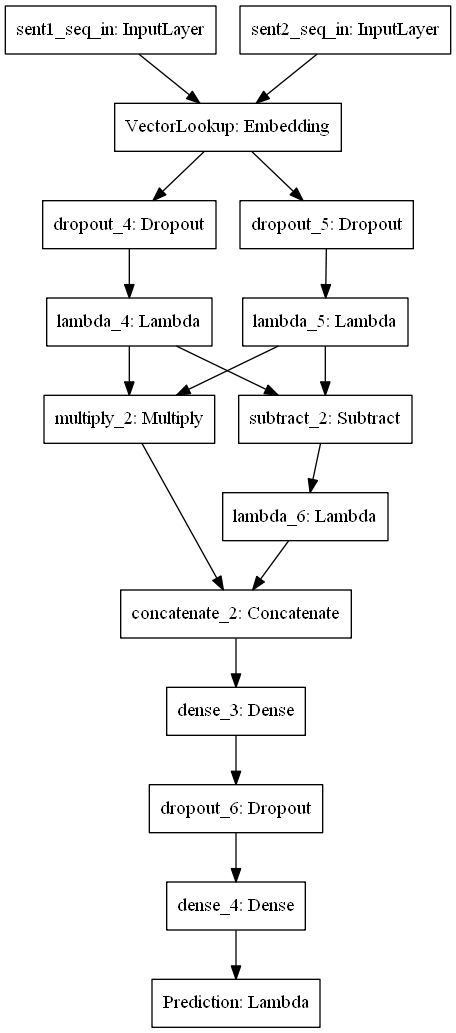

In [56]:
plot_model(model, to_file='model.png')

# Generate test value

In [57]:
Y_pred_test = model.predict(
    [X_test_1, X_test_2],
    use_multiprocessing=True,
    verbose=1,
    batch_size=32
)

1463/1463 [==============================] - 0s 73us/step


In [58]:
Y_pred_test[0:15]

array([[4.2212   ],
       [4.3275957],
       [4.4755774],
       [2.867058 ],
       [3.5481253],
       [3.8601177],
       [4.693903 ],
       [3.163648 ],
       [4.0279274],
       [4.652794 ],
       [2.6287546],
       [1.8922373],
       [4.708251 ],
       [4.612594 ],
       [4.5408616]], dtype=float32)

In [59]:
resultat = pd.DataFrame(columns=['id', 'score'])

In [60]:
score_test = []
for pred in Y_pred_test:
    score_test.append(pred[0])

In [61]:
resultat['score'] = score_test
resultat['id'] = data_test['id']

resultat.head()

,id,score
0,100000,4.221200
1,100001,4.327596
2,100002,4.475577
3,100003,2.867058
4,100004,3.548125


In [ ]:
resultat.to_csv('./results/siamese_nn.csv', index=False)